# Plotting Model Predictions 

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import tensorflow as tf
import scipy as scp
import matplotlib.pyplot as plt
import os
import dnnregressor_predictor as dnn_pred
import dnnregressor_model_and_input_fn as dnn_model_input
import make_data_wfpt as mdw
import make_data_sin as mds

In [2]:
hyper_params = pd.read_csv('/Users/admin/OneDrive/git_repos/nn_likelihoods/tensorflow_models/dnnregressor_mse_08_09_18_21_38_46/dnn_training_results_08_09_18_21_38_46.csv',
                          converters = {'hidden_units':eval,
                                        'activations':eval})

model_params = hyper_params.to_dict(orient = 'list')
for key in model_params.keys():
    model_params[key] = model_params[key][0]

In [ ]:
# Get best checkpoint
with open('/Users/admin/OneDrive/git_repos/nn_likelihoods/tensorflow_models/dnnregressor_mse_08_06_18_17_40_28/best_checkpoint.txt', 'r') as myfile:
    best_checkpoint = myfile.read().replace('\n', '')

In [35]:
# Generate a dataset wfpt
dataset,_, __ = mdw.make_data_rt_choice(v_range = [2,2], # uniform [0.6, 0.6]
                              a_range = [0.5,0.5], # unifor
                              w_range = [0.5, 0.5],  # uniform
                              rt_params = [1,2], # gamma(1,2)
                              n_samples = 10000,
                              write_to_file = False)

# Generate a dataset sin
features_sin, labels_sin = mds.make_data()

datapoint 0 generated
datapoint 1000 generated
datapoint 2000 generated
datapoint 3000 generated
datapoint 4000 generated
datapoint 5000 generated
datapoint 6000 generated
datapoint 7000 generated
datapoint 8000 generated
datapoint 9000 generated
label 0 generated
label 1000 generated
label 2000 generated
label 3000 generated
label 4000 generated
label 5000 generated
label 6000 generated
label 7000 generated
label 8000 generated
label 9000 generated


In [36]:
# Make dataset feedable to tensorflow (wfpt)
features, labels, __, ___ = mdw.train_test_split_rt_choice(data = dataset,
                                                           p_train = 1,
                                                           write_to_file = False,
                                                           from_file = False)

# Make dataset feedable to tensorflow (sin)
# features_sin, labels_sin, __, __ = mds.train_test_split(features_sin, 
#                                                        labels_sin, 
#                                                        p = 1)

In [30]:
# Make feature columns (wfpt)
feature_columns = dnn_model_input.make_feature_columns_numeric(features = features)
model_params['feature_columns'] = feature_columns

In [ ]:
# Make feature columns (sin)
feature_columns_sin = dnn_model_input.make_feature_columns_numeric(features = features_sin)
model_params['feature_columns'] = feature_columns_sin

In [37]:
# Reinstantiate model
my_predictor = dnn_pred.get_dnnreg_predictor(model_directory = '/Users/admin/OneDrive/git_repos/nn_likelihoods/tensorflow_models/dnnregressor_mse_08_09_18_21_38_46/',
                                             params = model_params)

In [38]:
# Get Predictions (wfpt)
my_predictions = dnn_pred.get_predictions(regressor = my_predictor,
                                         features = features,
                                         labels = labels,
                                         checkpoint = "/Users/admin/OneDrive/git_repos/nn_likelihoods/tensorflow_models/dnnregressor_mse_08_09_18_21_38_46/model.ckpt-96000")





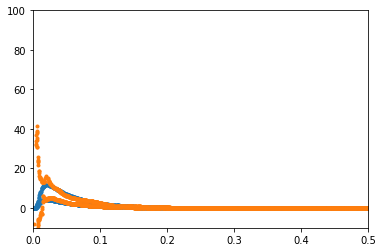

In [45]:
# Plot outcome (wfpt)
plt.plot(dataset['rt'], dataset['nf_likelihood'], '.')
plt.plot(dataset['rt'], my_predictions.flatten(), '.')
plt.xlim((0,0.5))
plt.ylim((-10, 100))
plt.show()

In [ ]:
# Get Predictions (sin)
my_predictions = dnn_pred.get_predictions(regressor = my_predictor,
                                         features = features_sin,
                                         labels = labels_sin)

In [ ]:
# Plot outcome (sin)
plt.plot(features_sin['x_0'][features_sin['x_1'] == 0], labels_sin[features_sin['x_1'] == 0], '.')
plt.plot(features_sin['x_0'][features_sin['x_1'] == 1], labels_sin[features_sin['x_1'] == 1], '.')
plt.plot(features_sin['x_0'], my_predictions.flatten(), '.', color = 'yellow')
plt.xlim((-10,10))
plt.show()